# Figure generator for optimal packing of attractor states

Imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

## Figure 1: cartoon

In [2]:
x = np.linspace(-3, 10, 200)

sig = 0.1
mu1 = -1
mu2 = 5
mu3 = 8

pss = (1/3)*(  norm.pdf(x, loc=mu1, scale=sig) + norm.pdf(x, loc=mu2, scale=sig) + norm.pdf(x, loc=mu3, scale=sig) ) +1e-20

scaler = 0.1
V = - np.log(pss)
V = scaler*V

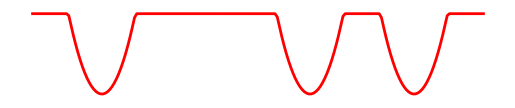

In [3]:
fig, ax = plt.subplots()
plt.plot(x, V, color='red', linewidth=2)
plt.axis('off')
ax.set_aspect(0.5)
plt.savefig('results/landscape.png', bbox_inches='tight', transparent=True)
plt.savefig('results/landscape.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Figure 2: uniform topology

Plot complete graphs.

In [6]:
def plot_complete_graph(M):
    
    ang = np.linspace(0, 2*np.pi, M+1)
    #print(ang)
    
    fig, ax = plt.subplots()
    for i in range(0, M):
        for j in range(0, M):
            plt.plot([np.cos(ang[i]), np.cos(ang[j])], [np.sin(ang[i]), np.sin(ang[j])], color='red')
    
    plt.scatter(np.cos(ang), np.sin(ang),color='black', s=100,zorder=3)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax.set_aspect('equal')
    plt.axis('off')
    
    plt.savefig('results/complete'+str(M)+'.png', bbox_inches='tight', transparent=True)
    plt.savefig('results/complete'+str(M)+'.pdf', bbox_inches='tight', transparent=True)
    plt.show()

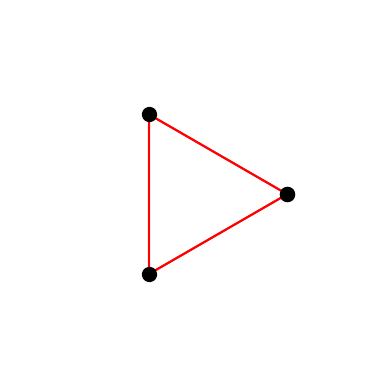

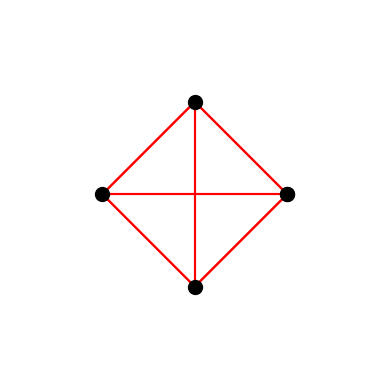

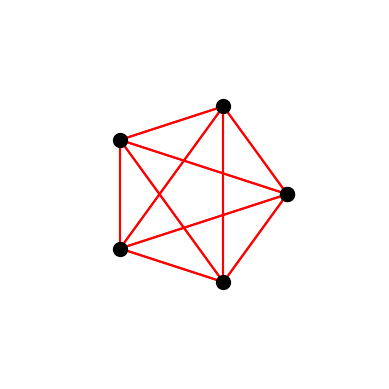

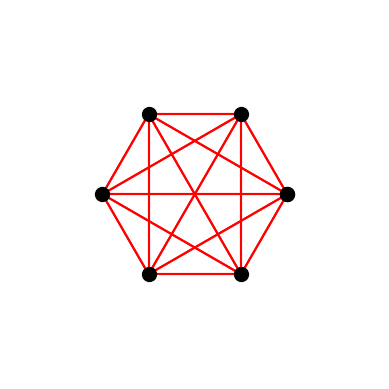

In [7]:
plot_complete_graph(3)
plot_complete_graph(4)
plot_complete_graph(5)
plot_complete_graph(6)

Plot simplices.

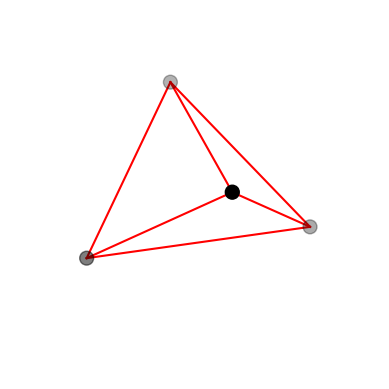

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['red', 'orange', 'green', 'blue']

xs = [0, 1, 1, 0]
ys = [0, 1, 0, 1]
zs = [0, 0, 1, 1]


img = ax.scatter(xs, ys, zs, color='black',s=100)
    
plt.plot([0, 1], [0,1], [0,0], color=colors[0])
plt.plot([0, 1], [0,0], [0,1], color=colors[0])
plt.plot([0, 0], [0,1], [0,1], color=colors[0])
plt.plot([1, 1], [1,0], [0,1], color=colors[0])
plt.plot([1, 0], [1,1], [0,1], color=colors[0])
plt.plot([1, 0], [0,1], [1,1], color=colors[0])
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.axis('off')
plt.savefig('results/3simp.png', bbox_inches='tight', transparent=True)
plt.savefig('results/3simp.pdf', bbox_inches='tight', transparent=True)
plt.show()

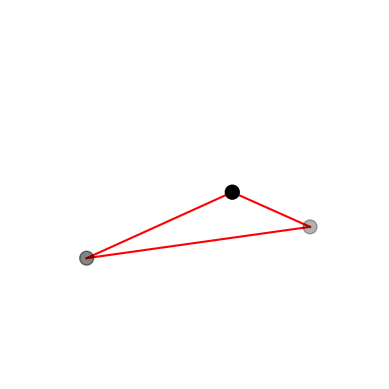

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['red', 'orange', 'green', 'blue']

xs = [0, 1, 1]
ys = [0, 1, 0]
zs = [0, 0, 1]

img = ax.scatter(xs, ys, zs, color='black',s=100)
    
plt.plot([0, 1], [0,1], [0,0], color=colors[0])
plt.plot([0, 1], [0,0], [0,1], color=colors[0])
plt.plot([1, 1], [1,0], [0,1], color=colors[0])
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal')
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.axis('off')
plt.savefig('results/2simp.png', bbox_inches='tight', transparent=True)
plt.savefig('results/2simp.pdf', bbox_inches='tight', transparent=True)
plt.show()

Plot objective function as function of distance.

In [13]:
# parameters

alpha = 0.065  #0.065 is used | 0.09 also?
M = 6

In [14]:
# objective for uniform topology

def get_J_uniform(d, b, alpha, M):
    Z = (M-1)*np.exp(-(d*d)/2)
    
    term1 = 2*np.log(  np.exp(b) + Z )
    term2 = - np.log(  np.exp(2*b) + 2*(M-2)*np.exp(b - (d*d)/2) + (M*M - 3*M + 5)*np.exp(-d*d)   )
    term3 = alpha*((M-1)/M)*(d*d)/4
    
    J = term1 + term2 + term3
    
    return J

d = np.linspace(-3.7,3.7,200)
b = np.array([0, 0.5, 1, 2, 4])
d_ = d[np.newaxis,:]
b_ = b[:,np.newaxis]
J = get_J_uniform(d_, b_, alpha, M)

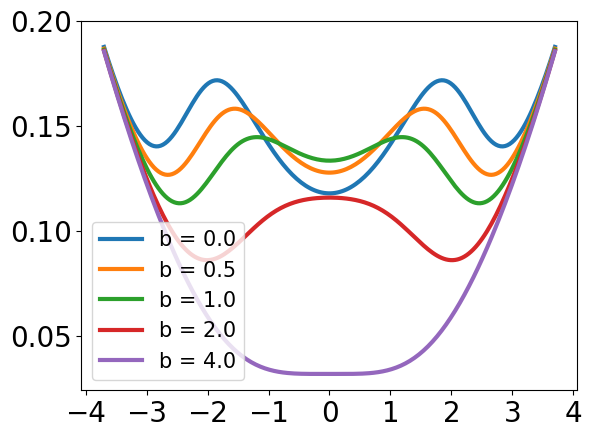

In [15]:
fig, ax = plt.subplots()
for i in range(len(b)):
    plt.plot(d, J[i,:], label='b = '+str(b[i]),linewidth=3)
plt.legend(fontsize=15)
#plt.xlabel('$d$', fontsize=20)
#plt.ylabel('$J$', fontsize=20)

plt.ylim(None,0.18)
plt.xticks(fontsize=20)
plt.yticks([0.05, 0.10, 0.15, 0.2], fontsize=20)
plt.savefig('results/J_uniform.png', bbox_inches='tight',transparent=True)
plt.savefig('results/J_uniform.pdf', bbox_inches='tight', transparent=True)
plt.show()

Interpretation. Bias too small, why bother? Bias too big, too easy to care.

Plot optimal solution to objective as function of bias. (ratio of bias and reg?)

In [16]:
# use simple 1D solver

d2 = np.linspace(-3.5,3.5,400)
b2 = np.linspace(0, 4.5, 400)
d2_ = d2[np.newaxis,:]
b2_ = b2[:,np.newaxis]
J2 = get_J_uniform(d2_, b2_, alpha, M)

(400, 400)
(400,)


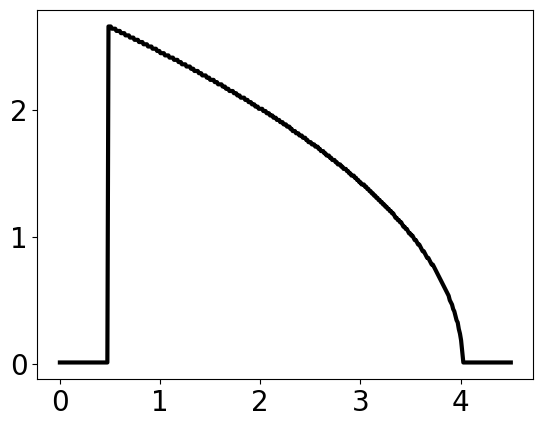

In [17]:
test = np.abs(d2[np.argmin(J2,axis=1)])

plt.plot(b2, test, color='black',linewidth=3)
#plt.xlabel('$b$', fontsize=20)
#plt.ylabel('optimal $d$', fontsize=20)
plt.xticks(ticks=[0, 1, 2, 3, 4],fontsize=20)
plt.yticks(ticks=[0, 1, 2], fontsize=20)
plt.savefig('results/uniform_optimal_d.png', bbox_inches='tight')
plt.savefig('results/uniform_optimal_d.pdf', bbox_inches='tight')
plt.show()

## Figure 3: square topology

Aesthetic stuff. Plot plain square.

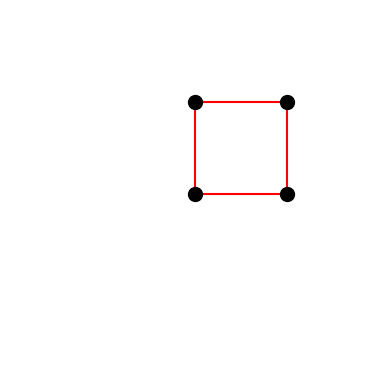

In [18]:
fig, ax = plt.subplots()


plt.scatter([0, 0, 1, 1], [0, 1, 0, 1],color='black', s=100,zorder=3)
plt.plot([0,0], [0,1], color='red')
plt.plot([0,1], [0,0], color='red')
plt.plot([1,1], [0,1], color='red')
plt.plot([0,1], [1,1], color='red')

plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_aspect('equal')
plt.axis('off')

plt.savefig('results/square.png', bbox_inches='tight', transparent=True)
plt.savefig('results/square.pdf', bbox_inches='tight', transparent=True)
plt.show()


Plot some extra squares.

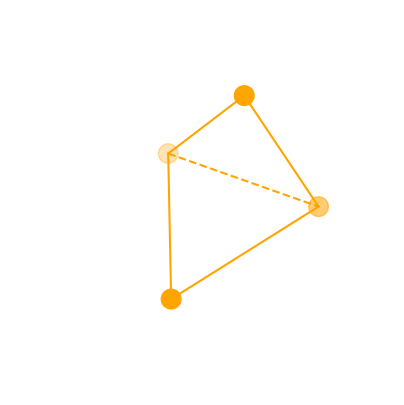

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

xs = np.array([0,0, 1, 0])
ys = np.array([1,0,1,2])
zs = np.array([1,0,0,0])
img = ax.scatter(xs, ys, zs, color=colors[1],s=200)

plt.plot([xs[0], xs[1]], [ys[0], ys[1]],[zs[0],zs[1]], color='orange')
plt.plot([xs[1], xs[2]], [ys[1], ys[2]],[zs[1],zs[2]], color='orange')
plt.plot([xs[0], xs[3]], [ys[0], ys[3]],[zs[0],zs[3]], color='orange')
plt.plot([xs[3], xs[2]], [ys[3], ys[2]],[zs[3],zs[2]],color='orange')
plt.plot([xs[1], xs[3]], [ys[1], ys[3]],[zs[1],zs[3]],color='orange', linestyle='--')


ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=50, azim=25, roll=0)
ax.axis('off')

for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(25)

plt.savefig('results/square_apriori2.png',bbox_inches='tight',transparent=True)
plt.savefig('results/square_apriori2.pdf',bbox_inches='tight',transparent=True)
plt.show()

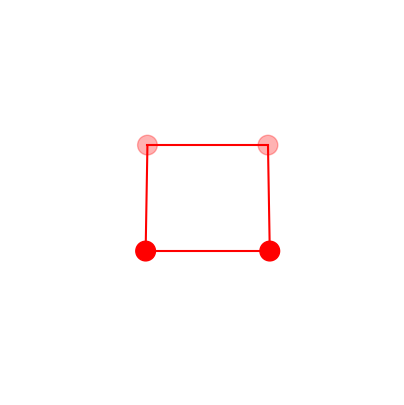

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')


xs = np.array([-1,0, 1, 0])
ys = np.array([1,0,1,2])
zs = np.array([0,0,0,0])
img = ax.scatter(xs, ys, zs, color=colors[0],s=200)

plt.plot([xs[0], xs[1]], [ys[0], ys[1]],[zs[0],zs[1]], color='red')
plt.plot([xs[1], xs[2]], [ys[1], ys[2]],[zs[1],zs[2]], color='red')
plt.plot([xs[0], xs[3]], [ys[0], ys[3]],[zs[0],zs[3]], color='red')
plt.plot([xs[3], xs[2]], [ys[3], ys[2]],[zs[3],zs[2]],color='red')


ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=60, azim=45, roll=0)
ax.axis('off')

for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(25)

plt.savefig('results/square_apriori1.png',bbox_inches='tight',transparent=True)
plt.savefig('results/square_apriori1.pdf',bbox_inches='tight',transparent=True)
plt.show()

Plot heatmaps of J as function of d and L.

In [30]:
# parameters
alpha = 4*0.1

In [31]:
# objective

def get_J_square(d, L, b, alpha):
    
    Z = 2*np.exp(-(d*d)/2) + np.exp(-L*L/2)
    
    term0 = np.log(Z) 
    term1 = 2*np.log(  np.exp(b) + Z )
    term2 = d*d/2
    term3 = - np.log(  np.exp(2*b) + 4*np.exp(b)*np.exp(-L*L/2) + 3*np.exp(-L*L) + 4*np.exp(-d*d)  )
    term4 = (alpha/4)*(   (d*d/2) + (L*L/4))
    
    J = term0 + term1 + term2 + term3 + term4
    
    return J

In [32]:
L_min, L_max = -6.5, 6.5
d_min, d_max = -3.5, 3.5
d = np.linspace(d_min,d_max,200)
L = np.linspace(L_min, L_max, 400)
b = np.array([0, 0.5, 1, 2, 4])

d_ = d[np.newaxis,:,np.newaxis]
b_ = b[:,np.newaxis,np.newaxis]
L_ = L[np.newaxis,np.newaxis,:]   # b, d, L 

J = get_J_square(d_, L_, b_, alpha)

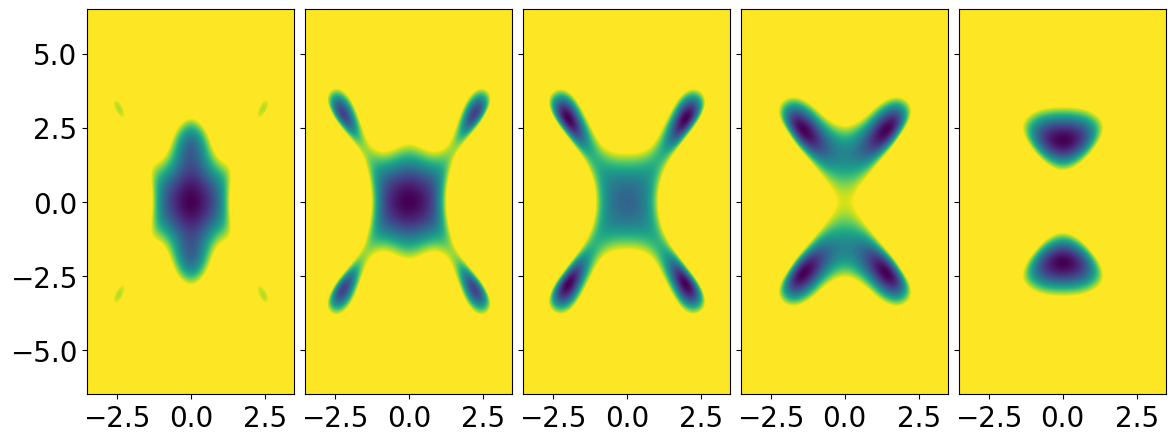

In [33]:
fig, ax = plt.subplots(nrows=1,ncols=len(b),sharex=True,sharey=True,figsize=(15,5))

for i in range(len(b)):     
    get_min = np.min(J[i,:,:])
    tol = 0.1
    J_ = np.clip(J[i,:,:],None,get_min+tol)

    pos = ax[i].imshow(J_.T, origin='lower', extent=(d_min, d_max, L_min, L_max))
    #ax.set_xlabel('$d$', fontsize=20)
    #ax.set_ylabel('$L$', fontsize=20)
    #fig.colorbar(pos, ax=ax)

    ax[i].tick_params(axis='both', which='major', labelsize=20)
    ax[i].tick_params(axis='both', which='minor', labelsize=20)

plt.subplots_adjust(wspace=-0.25)
plt.savefig('results/Jheat_square.png', bbox_inches='tight')
plt.savefig('results/Jheat_square.pdf', bbox_inches='tight')
plt.show()

Plot optimal solutions for a few parameter values.

In [34]:
# use simple 1D solver

L_min, L_max = -6.5, 6.5
d_min, d_max = -3.5, 3.5
d2 = np.linspace(d_min,d_max,200)
L2 = np.linspace(L_min, L_max, 400)

b2 = np.linspace(0, 6, 400)

d2_ = d2[np.newaxis,:,np.newaxis]
b2_ = b2[:,np.newaxis,np.newaxis]
L2_ = L2[np.newaxis,np.newaxis,:]   # b, d, L 

d3_, L3_ = np.meshgrid(d2, L2, indexing='ij')
d3_ = d3_.flatten()
L3_ = L3_.flatten()

J2 = get_J_square(d2_, L2_, b2_, alpha)

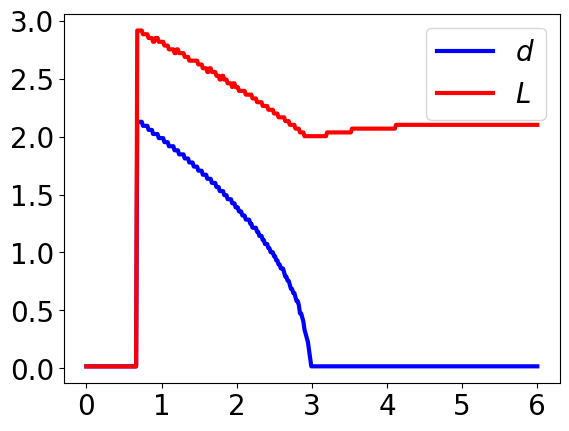

(400,)


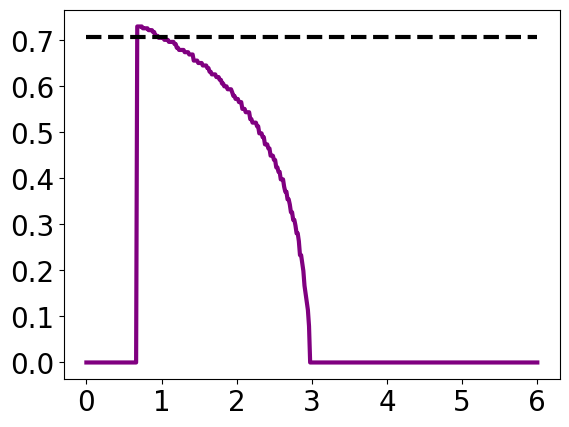

In [35]:
d_opt = np.zeros_like(b2)
L_opt = np.zeros_like(b2)

for i in range(len(b2)):
    arg = np.argmin(J2[i,:,:])
    
    d_opt[i] = np.abs(d3_[arg])
    L_opt[i] = np.abs(L3_[arg])


plt.plot(b2, d_opt, color='blue', label='$d$',linewidth=3)
plt.plot(b2, L_opt, color='red', label='$L$',linewidth=3)
#plt.xlabel('$b$', fontsize=20)
#plt.ylabel('optimal distance', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('results/square_optimal_dL.png', bbox_inches='tight',transparent=True)
plt.savefig('results/square_optimal_dL.pdf', bbox_inches='tight',transparent=True)
plt.show()

mask = (d_opt > 0.1)*(L_opt!=0.1)
print(mask.shape)

ratio = d_opt/L_opt
ratio = ratio*mask

plt.plot(b2,ratio, color='purple',linewidth=3)
plt.plot(b2, (1/np.sqrt(2))*np.ones_like(b2), color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel('$b$', fontsize=20)
#plt.ylabel('$d_{opt}/L_{opt}$', fontsize=20)
plt.savefig('results/square_optimal_ratio.png', bbox_inches='tight',transparent=True)
plt.savefig('results/square_optimal_ratio.pdf', bbox_inches='tight',transparent=True)
plt.show()

Plot optimal arrangements in 3D.

In [36]:
def get_coords(d_opt, L_opt):
    
    
    cos_g = 1 - ((L_opt*L_opt)/(2*d_opt*d_opt))
    #print(cos_g)
    sin_g = np.sqrt(1 - cos_g**2)
    
    x_star = (L_opt**2)/(2*d_opt)
    y_star = (1 - cos_g)/(sin_g)*x_star
    z_star = np.sqrt(np.clip( L_opt**2 - (2/(1-cos_g))*y_star*y_star,0,None))
    
    #print(x_star, y_star, z_star)
    
    x = np.array([0,d_opt,d_opt*cos_g, x_star])
    y = np.array([0,0,d_opt*sin_g,y_star])
    z = np.array([0,0,0,z_star])
    return x, y, z

In [38]:
# use simple 1D solver

L_min, L_max = -6.5, 6.5
d_min, d_max = -3.5, 3.5
d3 = np.linspace(d_min,d_max,200)
L3 = np.linspace(L_min, L_max, 400)

b3 = np.array([1, 1.5, 2])

d3_ = d3[np.newaxis,:,np.newaxis]
b3_ = b3[:,np.newaxis,np.newaxis]
L3_ = L3[np.newaxis,np.newaxis,:]   # b, d, L 

d4_, L4_ = np.meshgrid(d3, L3, indexing='ij')
d4_ = d4_.flatten()
L4_ = L4_.flatten()


J3 = get_J_square(d3_, L3_, b3_, alpha)

In [39]:
d_opt3 = np.zeros_like(b3)
L_opt3 = np.zeros_like(b3)

for i in range(len(b3)):
    arg = np.argmin(J3[i,:,:])
    
    d_opt3[i] = np.abs(d4_[arg])
    L_opt3[i] = np.abs(L4_[arg])

C:\Users\johnv\AppData\Local\Temp\ipykernel_22028\3178773943.py:28: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(15)


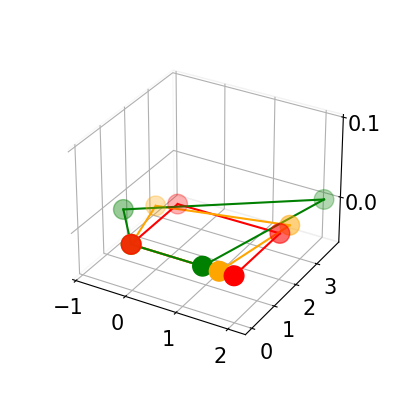

In [40]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

colors = ['red', 'orange', 'green', 'blue']
for i in range(len(b3)):
    xs, ys, zs = get_coords(d_opt3[i], L_opt3[i])
    
    img = ax.scatter(xs, ys, zs, color=colors[i],s=200)

    
    plt.plot([xs[0], xs[1]], [ys[0], ys[1]], color=colors[i])
    plt.plot([xs[0], xs[2]], [ys[0], ys[2]], color=colors[i])
    plt.plot([xs[1], xs[3]], [ys[1], ys[3]], color=colors[i])
    plt.plot([xs[2], xs[3]], [ys[2], ys[3]], color=colors[i])
    
    #ax.set_xlabel('X')
    #ax.set_ylabel('Y')
    #ax.set_zlabel('Z')
    
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.xticks(ticks=[-1,0, 1, 2],fontsize=15)
plt.yticks(ticks=[0,1,2,3],fontsize=15)
ax.set_zticks([0,0.1])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(15)

plt.savefig('results/square_examples.png',bbox_inches='tight',transparent=True)
plt.savefig('results/square_examples.pdf',bbox_inches='tight',transparent=True)
plt.show()